# Import the dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../Telco_customer_churn.xlsx'
# Load the dataset
data = pd.read_excel(path)

# Display the first few rows of the dataset
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Data Types in Each Column

In [11]:
print(data.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


# Meaning of Data Columns 

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Check for missing values

In [12]:
# count Na values in the data
print(data.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


# Discovery

Churn Reason is the only column with missing values 

# Understand the Target Variable Distribution

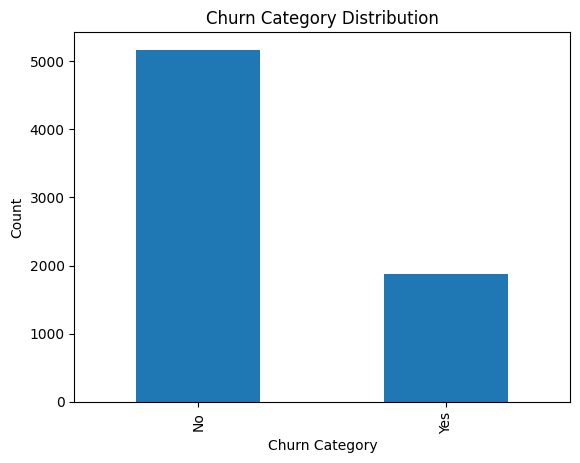

In [14]:
# the target variable distribution using a bargraph 
data['Churn Label'].value_counts().plot(kind='bar')
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

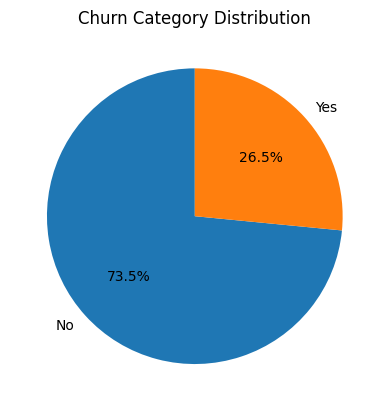

In [15]:
# using a pie chart to visualize the distribution of the target variable
data['Churn Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Category Distribution')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.show()

# Observation

There are `7043` individuals observed in the churn dataset. Of these individuals:

1. The people that leave the Telco company are `26.5%`
2. The people that are retained in the Telco are `73.5%`

## What this means for later steps 

The highly skewed distribution means that when developing prediction models:

1. There will be a need to use techniques like **resampling** (oversampling the minority class or undersampling the majority class) or 
2. class weighting when training your model to avoid biased predictions.

# Analyze the Categorical Features

1. Country 
2. State
3. City
4. Senior Citizen 
5. Partners
6. Dependents
7. Phone Service (Subscribed to home service)
8. Multiple Lines (If the client is subscribed to multiple lines)
9. Internet Service (No, DSL, Fiber Optic, Cable)
10. Online Security
11. Online backup 
12. Device Protection
13. Technical Support (reduced wait time)
14. Streaming TV (the client uses internet for streaming)
15. Contract (contract type: month-to-month, one-year, two-year)
16. Paperless Billing (Customer billed separately)
17. Payment Method (Bank withdrawal, credit card, mailed cheques)

# Location Information

In [23]:
# create a table of data grouped by Country, State, and City with the count of customers in each group
grouped_location_data = data.groupby(['Country', 'State', 'City']).size().reset_index(name='Customer Count')
grouped_location_data.columns = ['Country', 'State', 'City', 'Customer Count']
print(grouped_location_data)

            Country       State          City  Customer Count
0     United States  California        Acampo               4
1     United States  California         Acton               4
2     United States  California      Adelanto               5
3     United States  California          Adin               4
4     United States  California  Agoura Hills               5
...             ...         ...           ...             ...
1124  United States  California         Yreka               4
1125  United States  California     Yuba City               8
1126  United States  California       Yucaipa               4
1127  United States  California  Yucca Valley               5
1128  United States  California         Zenia               4

[1129 rows x 4 columns]


In [25]:
location = pd.DataFrame(grouped_location_data)

# get the unique countries in location data 
unique_countries = location['Country'].unique()
print("Unique Countries:", unique_countries)


Unique Countries: ['United States']


In [26]:
unique_states = location['State'].unique()
print("Unique Countries:", unique_states)

Unique Countries: ['California']


# Observation

The data is made up of client information within the 

1. California state in,
2. The United States of America

In [33]:
import geopandas as gpd
from shapely.geometry import Point

# Note

`A shapefile is not a single file`

it's a collection of files with the same name but different extensions. At a minimum:

- `.shp` (the main file)

- `.shx` (the index file)

- `.dbf` (the attribute data)

Even though the aim is trying to read the `.shx` file, geopandas needs the others to be present in the same directory to read the full dataset.

$\therefore$ Ensure that all the necessary shapefile components are in the same folder and that their names match exactly.

In [78]:
shapefile = '../Counties.shp'
california_counties = gpd.read_file(shapefile)

# Convert the 'Longitude' and 'Latitude' columns to a list of shapely Point objects
loc_points = data[['Country', 'State', 'City', 'Latitude', 'Longitude']].copy()

geometry = [Point(xy) for xy in zip(loc_points['Longitude'], loc_points['Latitude'])]

geo_data = gpd.GeoDataFrame(loc_points, geometry=geometry, crs="EPSG:4326")

# assume the California counties shapefile is in a standard geographic CRS, like EPSG:4326.

## CRS Compatibility

Make sure that both the shapefile (california_counties) and the GeoDataFrame (geo_data) are using the same Coordinate Reference System (CRS). Even though you assumed both are in EPSG:4326, it's good to explicitly check this.



In [79]:
counties_gdf = california_counties.to_crs(epsg=4326)
print(counties_gdf.crs)

print(geo_data.crs)


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

## Convert the California CRS to Geo Data CRS

In [68]:
# Convert GeoDataFrame CRS to match shapefile if needed
if geo_gdf.crs != counties_gdf.crs:
    geo_gdf = geo_data.to_crs(counties_gdf.crs)

## Confirm Data Point Location

In [69]:
print(geo_gdf[['Latitude', 'Longitude']].describe())

          Latitude    Longitude
count  7043.000000  7043.000000
mean     36.282441  -119.798880
std       2.455723     2.157889
min      32.555828  -124.301372
25%      34.030915  -121.815412
50%      36.391777  -119.730885
75%      38.224869  -118.043237
max      41.962127  -114.192901


## Expectation

California's geographic bounding box, in general, ranges approximately from `latitude 32.5` to `42.0` and `longitude -124.5` to `-114.0`.

## Observation

The latitudes fall within the expected bounds with 

- min latitude `32.6`
- max latitude `42.0`

The longutudes also fall within the expected bounds 

- min latitude `-124.3`
- max latitude `-114.2`

## Confirm the data has values

In [70]:
print(geo_gdf.head())

         Country       State         City   Latitude   Longitude  \
0  United States  California  Los Angeles  33.964131 -118.272783   
1  United States  California  Los Angeles  34.059281 -118.307420   
2  United States  California  Los Angeles  34.048013 -118.293953   
3  United States  California  Los Angeles  34.062125 -118.315709   
4  United States  California  Los Angeles  34.039224 -118.266293   

                      geometry  
0  POINT (-118.27278 33.96413)  
1  POINT (-118.30742 34.05928)  
2  POINT (-118.29395 34.04801)  
3  POINT (-118.31571 34.06212)  
4  POINT (-118.26629 34.03922)  


In [71]:
print(counties_gdf.head())

   Year CountyName COUNTY_FIP  DistrictCo  \
0  2023    Alameda        001          22   
1  2023     Alpine        003           2   
2  2023     Amador        005           2   
3  2023     Colusa        011           5   
4  2023  El Dorado        017          16   

                                            geometry  
0  MULTIPOLYGON (((-13577345.44413 4504491.19608,...  
1  POLYGON ((-13312191.38721 4680675.25872, -1331...  
2  POLYGON ((-13366398.97864 4679185.22672, -1336...  
3  POLYGON ((-13568735.66426 4776807.6451, -13568...  
4  POLYGON ((-13347688.73267 4712126.05147, -1334...  


## Plot the data 

/tmp/ipykernel_58533/1698424413.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


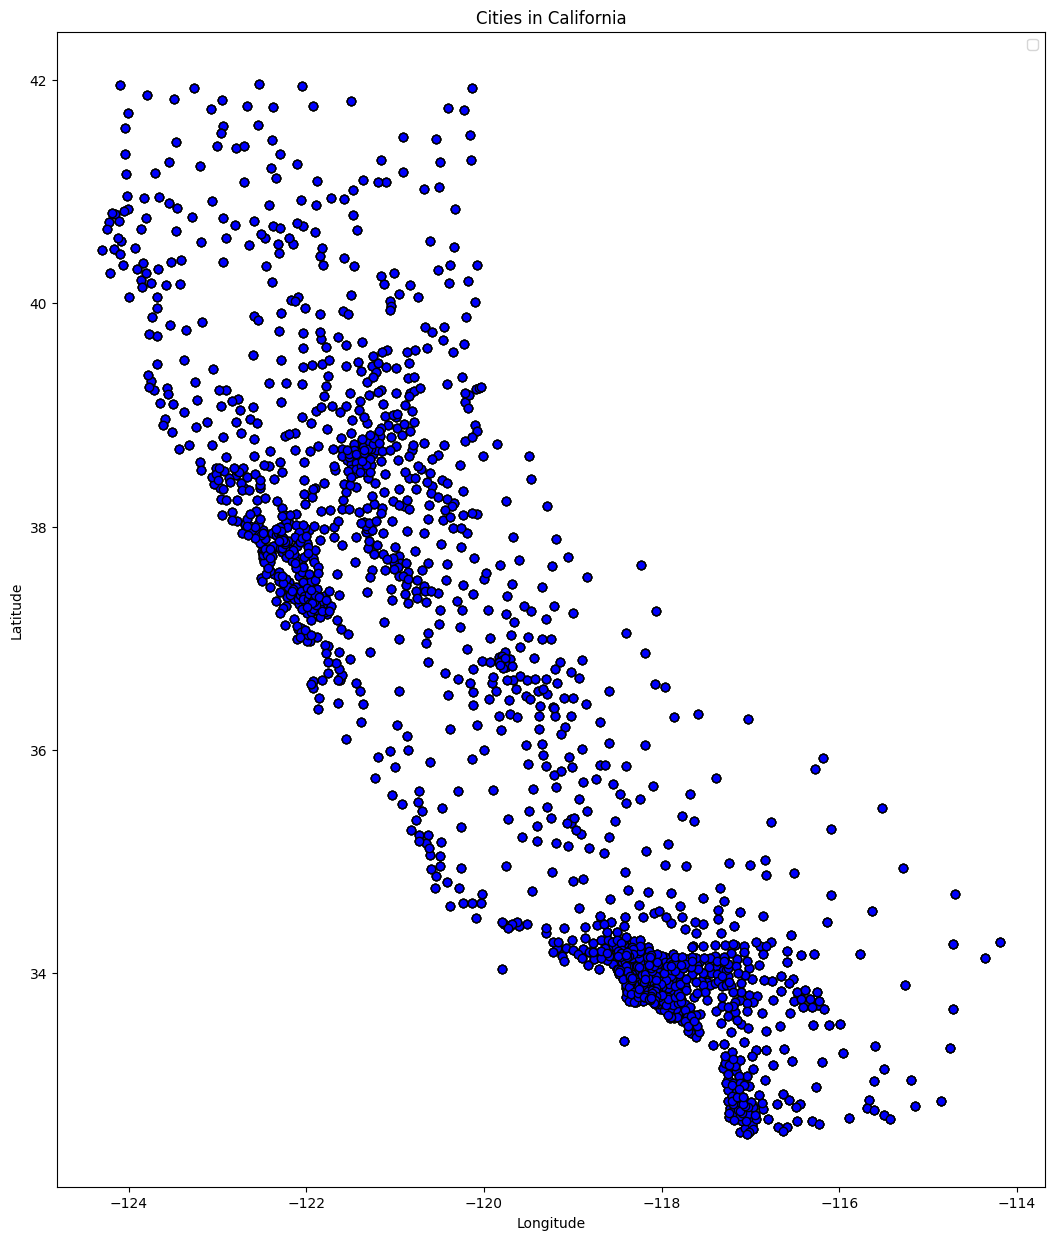

In [72]:
merged_gdf = gpd.sjoin(geo_gdf, counties_gdf, how='left')

# plot the data 
fig, ax = plt.subplots(figsize=(15, 15))

merged_gdf.plot(ax=ax, color='blue', edgecolor='black')

# Optionally, add titles and legends
plt.title('Cities in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


ValueError: aspect must be finite and positive 

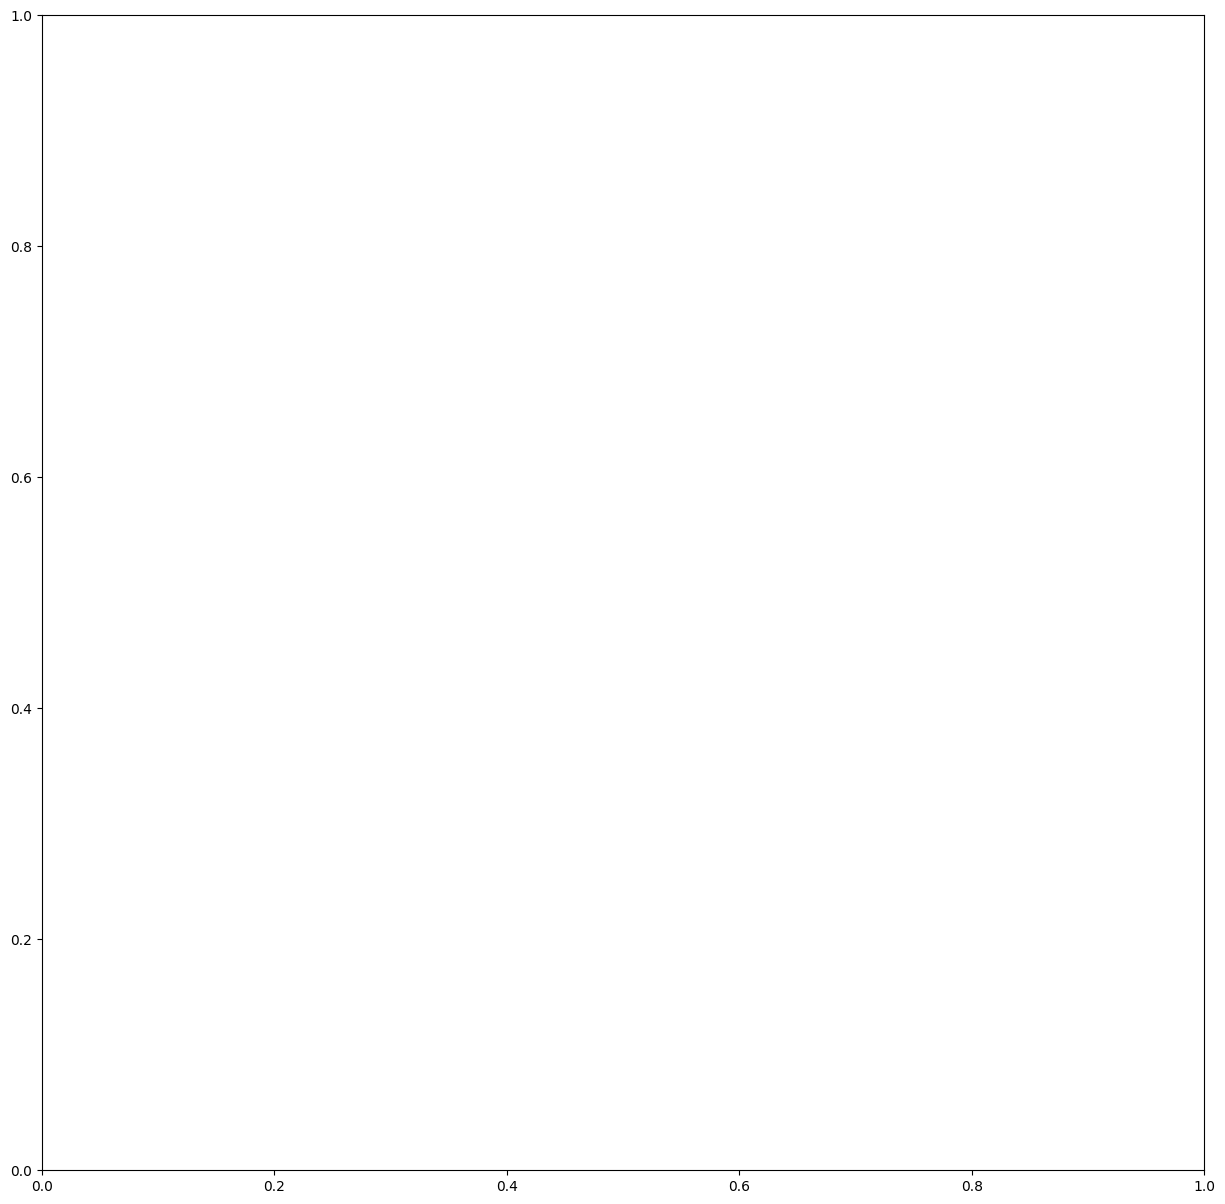

In [77]:
fig, ax = plt.subplots(figsize=(15, 15))

counties_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_gdf.plot(ax=ax, color='blue', markersize=5)
plt.title('Cities in California with County Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()